
#### Student Name: Rajath Akshay Vanikul


Date: 02/04/2017

Version: 2.0

Environment: Python 3.6.0 and Anaconda 4.3.0 (64-bit)

Libraries used:
* pandas 0.19.2 (for data frame, included in Anaconda Python 3.6) 
* networkx (to create network between coordinates, !pip install networkx) 
* datetime 3.2 (module that supplies classes for manipulating dates and times, included in Anaconda Python 3.6)
* matplotlib 3.0.3 (data visualization and plotting, included in Anaconda Python 3.6)
* math 3.7.3 (mathematical functions, included in Anaconda Python 3.6)
* seaborn 9.0 (data visualization library, included in Anaconda Python 3.6)
* sklearn 20.2 (machine learning library, included in Anaconda Python 3.6)



## Table of Contents

1. [Introduction](#sec_1)
2. [Import libraries](#sec_2)
3. [Detect and fix errors](#sec_3)
4. [Impute the missing values](#sec_4)
5. [Detect and remove outliers](#sec_5)
6. [Summary](#sec_6)
7. [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The task is to explore and understand the dataset about Uber Ridesharing data in Victoria, Australia. Perform both graphical and non-graphical EDA methods to understand the data first and then find the data problems. We perform the following subtasks:
* Detect and fix errors in dirty_data.csv.
* Impute the missing values in missing_value.csv.
* Detect and remove outliers in outliers.csv.

We start off with detecting **Syntactic Anomalies** and **Semantic Anomalies** in the dirty data and figureout the best way to fix these errors. We will then proceed to imputing missing data and removing outliers from respective datasets.

## 2.  Import libraries <a class="anchor" id="sec_2"></a>

In [1]:
import pandas as pd
import networkx as nx
from datetime import datetime
from datetime import datetime,time
from math import sin,cos,sqrt,atan2,radians
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 3. Detect and fix errors in dirty data<a class="anchor" id="sec_3"></a>

As a first step, we first load the data `29498724_dirty_data.csv` using Pandas library.

In [2]:
dirty_data = pd.read_csv("29498724_dirty_data.csv") # read the csv to a variable as a data frame.

We start by looking at the dimensionality of the data and a few lines of the data.

In [3]:
print("dimensions of dataframe:",dirty_data.shape) # prints dimensions of df
dirty_data.head() # print first 5 lines of df

dimensions of dataframe: (313, 14)


,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,ID1920853184,0,2,4,-37.820668,144.946186,-37.803871,144.991736,5282.4,2018-06-11,05:09:31,1275.96,5:30:46,15.13
1,ID1295376468,0,3,1,-37.826913,144.989550,-37.808180,144.976636,2733.0,2018-06-19,21:36:01,676.02,21:47:17,12.61
2,ID3517420444,1,1,5,-37.818743,144.962592,-37.805488,144.936807,3175.0,2018-06-17,12:10:54,812.22,12:24:26,18.58
3,ID5711503922,2,2,8,-37.817887,144.946647,-37.807202,145.026637,8188.2,2018-06-24,15:31:07,2085.48,16:05:52,156.83
4,ID3173220900,1,5,8,-37.810649,144.929172,-37.815834,145.046450,11329.0,2018-04-05,06:21:25,3162.36,7:14:07,18.97


We shall have a look at some key information about each variable to determine appropriate methods to audit the data.

Categorical:
    * Uber type
    * Origin Region
    * Destination Region
    
Continuous:
    * Origin Latitude
    * Origin Longitude
    * Destination Latitude
    * Destination Longitude
    * Fare
    
Discrete:
    * Journey Distance
    * Travel Time
    

In [4]:
dirty_data.info() # information about data type and entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 14 columns):
Unnamed: 0               313 non-null object
Uber Type                313 non-null int64
Origin Region            313 non-null int64
Destination Region       313 non-null int64
Origin Latitude          313 non-null float64
Origin Longitude         313 non-null float64
Destination Latitude     313 non-null float64
Destination Longitude    313 non-null float64
Journey Distance(m)      313 non-null float64
Departure Date           313 non-null object
Departure Time           313 non-null object
Travel Time(s)           313 non-null float64
Arrival Time             313 non-null object
Fare$                    313 non-null float64
dtypes: float64(7), int64(3), object(4)
memory usage: 34.3+ KB


Understanding distribution of the numerical values across the samples:
* We have 313 records with no missing values in the data
* Uber type is a categorical feature with 3 category, but we see value 0 as min and 3 as max.
* Origin latitude has a max value of 38.11 which can not belong to Melbourne.
* Destination latitude has a max value of 38.11 which can not belong to Melbourne.
* A large positive skewness is noticed in Journey distance.
* Travel time and Fare has slight positive skewness.

In [5]:
dirty_data.describe() # describes the distribution of a variable

,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,0.785942,4.993610,5.083067,-36.629217,144.937915,-36.632531,144.941441,14631.114377,3844.788754,57.286805
std,0.756718,2.399243,2.515236,9.515625,0.095858,9.507312,0.101824,15396.891208,3714.064018,123.005351
min,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,841.000000,217.320000,5.890000
25%,0.000000,3.000000,3.000000,-37.824240,144.927580,-37.821320,144.929385,5205.000000,1326.600000,13.640000
50%,1.000000,5.000000,5.000000,-37.814165,144.951695,-37.814985,144.969468,8723.000000,2437.380000,18.970000
75%,1.000000,7.000000,7.000000,-37.803019,144.992533,-37.804476,144.996355,12376.000000,3866.940000,32.690000
max,3.000000,9.000000,9.000000,38.110916,145.046450,38.110916,145.046450,51061.000000,13204.980000,807.500000


Examining distribution of categorical variables:
* No duplicate entires as there are no duplicates ID.
* Two trips with the same time Arrival time.
* seven trips on the day of 31st April 2018, However, april contains only 30 days.

In [6]:
dirty_data.describe(include=['O']) # describes the distribution of a variable

,Unnamed: 0,Departure Date,Departure Time,Arrival Time
count,313,313,313,313
unique,313,155,313,312
top,ID3135297593,2018-03-06,16:18:26,2:54:57
freq,1,7,1,2


For convenience, we will convert all the scapes in the column names to "_"

In [7]:
dirty_data.columns = [c.replace(' ', '_') for c in dirty_data.columns] # replace space to "_"

In [8]:
dirty_data.columns # print column names to check

Index(['Unnamed:_0', 'Uber_Type', 'Origin_Region', 'Destination_Region',
       'Origin_Latitude', 'Origin_Longitude', 'Destination_Latitude',
       'Destination_Longitude', 'Journey_Distance(m)', 'Departure_Date',
       'Departure_Time', 'Travel_Time(s)', 'Arrival_Time', 'Fare$'],
      dtype='object')

### 3.1 Identify Syntactical Anomalies 

Typos are the most common error, particularly whenever the data collection process involves human. While we were collecting the data, we might mis-type the category of the Uber type. It is always a good idea to check the categorical variables to make sure their values are spelled without errors.

We now try to explore the syntactical errors in Uber type as we found the min value to be 0 and max to be 3.

### Uber Type

In [9]:
dirty_data.Uber_Type.value_counts() # count of each Uber type

1    132
0    126
2     51
3      4
Name: Uber_Type, dtype: int64

We now understand that the 4 entries with the Uber type-3 could be a syntactical error.

In [10]:
dirty_data[dirty_data.Uber_Type==3] # print the records with Uber type 3

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$
126,ID1145625753,3,4,8,-37.815362,145.012267,-37.815834,145.046450,4089.0,2018-06-05,08:20:20,1327.44,8:42:27,7.57
140,ID5162847683,3,5,4,-37.810408,144.927289,-37.805429,145.004629,7911.0,2018-01-24,03:21:18,2075.10,3:55:53,155.88
144,ID3682087726,3,4,7,-37.812669,145.000282,-37.861835,144.905716,11027.0,2018-06-04,11:41:38,3577.20,12:41:15,20.53
148,ID1648221154,3,5,1,-37.815006,144.927606,-37.812310,144.951413,3843.0,2018-07-03,03:49:32,963.60,4:05:35,12.43


In [11]:
dirty_data["Fare$"].groupby(dirty_data["Uber_Type"]).describe() # distribution based on fare and Uber type.

,count,mean,std,min,25%,50%,75%,max
Uber_Type,,,,,,,,
0,126.0,15.909206,6.736646,5.89,11.6925,14.190,17.3650,34.14
1,132.0,26.652045,15.858122,6.30,15.8300,21.475,30.4275,66.31
2,51.0,239.445686,229.547638,15.51,95.3400,156.830,248.1750,807.50
3,4.0,49.102500,71.385440,7.57,11.2150,16.480,54.3675,155.88


After carefull examination, we understand that the Uber type could be determined by trip ID.

We have noticed the fact observed below:
    - Uber Type 1 has trip ID which starts with "3" -> ID3...
    - Uber Type 2 has trip ID which starts with "5" -> ID5...
    - Uber Type 0 has trip ID which starts with "1" -> ID1...

In [12]:
# Lets extract the digits of a trip ID 
dirty_data['ID'] = dirty_data['Unnamed:_0'].str[2:] # stripping the first two character of Trip ID.
dirty_data.ID.head()

0    1920853184
1    1295376468
2    3517420444
3    5711503922
4    3173220900
Name: ID, dtype: object

In [13]:
# ID which does not start with 1,3,5

# so we are sure that there are no IDs that does not start with 1,3 or 5.
dirty_data[~dirty_data.ID.str.startswith(("1","3","5"))]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID


Inspecting all the records with trip ID staring with 1.

In [14]:
filt = dirty_data[dirty_data.ID.str.startswith("1")] # filter all the records with trip ID which starts with 1
filt.Uber_Type.value_counts()

0    126
3      2
2      2
1      1
Name: Uber_Type, dtype: int64

In [15]:
filt[filt.Uber_Type == 1] # inspect the record with uber type 1 and starting with 1

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
146,ID1507113707,1,4,2,-37.807826,144.991988,-37.82231,144.946875,4714.0,2018-06-12,20:02:48,1304.7,20:24:32,10.72,1507113707


In [16]:
dirty_data.at[146, 'Uber_Type'] = 0  # fix the Uber type error to 0

temp_ID = list(filt[filt.Uber_Type == 1]["Unnamed:_0"]) # temp ID is introduced to keep a note of all the edited trip IDs

In [17]:
filt[filt.Uber_Type == 2] # inspect the record with uber type 2 and starting with 1

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
142,ID1845667334,2,1,4,-37.816199,144.964091,-37.805173,145.014994,5574.0,2018-01-28,23:38:11,1338.24,0:00:29,16.57,1845667334
147,ID1501019281,2,5,6,-37.812958,144.933682,-37.773803,144.983647,8913.0,2018-06-20,21:55:09,2579.76,22:38:08,15.51,1501019281


In [18]:
dirty_data.at[[142,147], 'Uber_Type'] = 0  # fix the Uber type error to 0

temp_ID.extend(filt[filt.Uber_Type == 2]["Unnamed:_0"]) # update the log

In [19]:
filt[filt.Uber_Type == 3] # inspect the record with uber type 3 and starting with 1

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
126,ID1145625753,3,4,8,-37.815362,145.012267,-37.815834,145.046450,4089.0,2018-06-05,08:20:20,1327.44,8:42:27,7.57,1145625753
148,ID1648221154,3,5,1,-37.815006,144.927606,-37.812310,144.951413,3843.0,2018-07-03,03:49:32,963.60,4:05:35,12.43,1648221154


In [20]:
dirty_data.at[[126,148], 'Uber_Type'] = 0  # fix the Uber type error to 0

temp_ID.extend(filt[filt.Uber_Type == 3]["Unnamed:_0"]) # update the log

Inspecting all the records with trip ID staring with 3.

In [21]:
filt = dirty_data[dirty_data.ID.str.startswith("3")] # filter all the records with trip ID which starts with 3
filt.Uber_Type.value_counts()

1    131
2      2
3      1
Name: Uber_Type, dtype: int64

In [22]:
filt[filt.Uber_Type == 2] # inspect the record with uber type 2 and starting with 3

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
130,ID3244592776,2,6,9,-37.773803,144.983647,-38.110916,144.654173,51061.0,2018-01-19,11:21:00,12976.5,14:57:16,58.28,3244592776
150,ID3589916506,2,6,9,-37.773845,144.983689,-38.110916,144.654173,48197.0,2018-03-17,22:20:16,11519.4,1:32:15,66.20,3589916506


In [23]:
dirty_data.at[[130,150], 'Uber_Type'] = 1  # fix the Uber type error to 1

temp_ID.extend(filt[filt.Uber_Type == 2]["Unnamed:_0"]) # update the log

In [24]:
filt[filt.Uber_Type == 3] # inspect the record with uber type 3 and starting with 3

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
144,ID3682087726,3,4,7,-37.812669,145.000282,-37.861835,144.905716,11027.0,2018-06-04,11:41:38,3577.2,12:41:15,20.53,3682087726


In [25]:
dirty_data.at[144, 'Uber_Type'] = 1  # fix the Uber type error to 1

temp_ID.extend(filt[filt.Uber_Type == 3]["Unnamed:_0"]) # update the log

Inspecting all the records with trip ID staring with 5.

In [26]:
filt = dirty_data[dirty_data.ID.str.startswith("5")] # filter all the records with trip ID which starts with 5
filt.Uber_Type.value_counts()

2    47
3     1
Name: Uber_Type, dtype: int64

In [27]:
filt[filt.Uber_Type == 3] # inspect the record with uber type 3 and starting with 5.

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
140,ID5162847683,3,5,4,-37.810408,144.927289,-37.805429,145.004629,7911.0,2018-01-24,03:21:18,2075.1,3:55:53,155.88,5162847683


In [28]:
dirty_data.at[140, 'Uber_Type'] = 2  # fix the Uber type error to 2

temp_ID.extend(filt[filt.Uber_Type == 3]["Unnamed:_0"]) # update the log

In [29]:
dirty_data.Uber_Type.value_counts() # Check the count of each Uber Type

1    134
0    131
2     48
Name: Uber_Type, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0b70f9e8>,
      dtype=object)

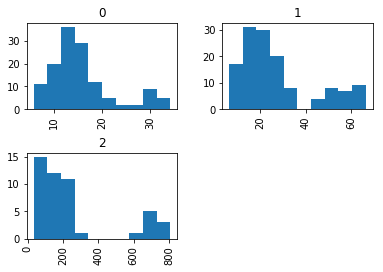

In [30]:
plot = dirty_data.hist(by="Uber_Type", column="Fare$") # plot the distribution of each Uber type and fare.
plot

### Departure Date

Now we examine another potential syntactical error with the departure date. which is a common type of typo error.
We have earlier seen that the date format is `Year-Month-Date`. However we can expect **lexical errors** in such entries of the data.

In [31]:
dirty_data[dirty_data["Departure_Date"] >= "2018-12"] # filter for the month greater than 12 a a string

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
186,ID3196044686,1,4,9,-37.798961,145.010999,-38.110916,144.654173,48906.0,2018-15-02,20:00:05,11909.52,23:18:34,58.57,3196044686
191,ID3408840141,1,6,8,-37.773845,144.983689,-37.815834,145.046450,10698.0,2018-21-06,09:41:52,2756.46,10:27:48,16.29,3408840141
195,ID3583467604,1,6,8,-37.790797,144.985865,-37.815834,145.046450,7470.0,2018-21-06,18:20:29,2302.38,18:58:51,18.65,3583467604
200,ID1225653996,0,5,8,-37.808915,144.935436,-37.815834,145.046450,10180.0,2018-27-03,10:17:57,2853.48,11:05:30,10.41,1225653996
201,ID5635060883,2,3,2,-37.818662,145.000787,-37.818570,144.947084,5112.0,2018-21-05,02:56:16,1318.74,3:18:14,110.79,5635060883


In [32]:
# we notice all this dates could potentially be flipped with date and month to correct it.

# perform replace operation on all the above 5 records.
dirty_data.Departure_Date.replace({'2018-15-02':'2018-02-15', '2018-21-06':'2018-06-21', 
                                   '2018-27-03':'2018-03-27', '2018-21-05':'2018-05-21'},inplace=True)

temp_ID.extend(dirty_data[dirty_data["Departure_Date"] >= "2018-12"]["Unnamed:_0"]) # update the log

To cross verify the result, we will need to saperate year, date and month of departure date.

In [33]:
# Lets seperate the date into day, month and year 
coltitle = dirty_data['Departure_Date'].apply(lambda s: pd.Series({'month': s.split('-')[1].split('-')[0].strip(),
                            'year':s.split('-')[0].strip(), 'day':s.split('-')[2].strip()}))
# Add the columns to our dataframe
dirty_data = pd.concat([dirty_data, coltitle], axis=1) 
#Drop the date column
dirty_data.head()

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year
0,ID1920853184,0,2,4,-37.820668,144.946186,-37.803871,144.991736,5282.4,2018-06-11,05:09:31,1275.96,5:30:46,15.13,1920853184,11,06,2018
1,ID1295376468,0,3,1,-37.826913,144.989550,-37.808180,144.976636,2733.0,2018-06-19,21:36:01,676.02,21:47:17,12.61,1295376468,19,06,2018
2,ID3517420444,1,1,5,-37.818743,144.962592,-37.805488,144.936807,3175.0,2018-06-17,12:10:54,812.22,12:24:26,18.58,3517420444,17,06,2018
3,ID5711503922,2,2,8,-37.817887,144.946647,-37.807202,145.026637,8188.2,2018-06-24,15:31:07,2085.48,16:05:52,156.83,5711503922,24,06,2018
4,ID3173220900,1,5,8,-37.810649,144.929172,-37.815834,145.046450,11329.0,2018-04-05,06:21:25,3162.36,7:14:07,18.97,3173220900,05,04,2018


In [34]:
# converting all the day,month and year records to integer values from string

dirty_data["day"] = pd.to_numeric(dirty_data["day"],downcast="integer")
dirty_data["month"] = pd.to_numeric(dirty_data["month"],downcast="integer")
dirty_data["year"] = pd.to_numeric(dirty_data["year"],downcast="integer")

In [35]:
dirty_data[dirty_data["year"] != 2018] # check for the record without 2018 as year

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year


In [36]:
dirty_data[dirty_data["month"] > 12] # check for the record with month more than 12

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year


In [37]:
temp = dirty_data[(dirty_data["month"] == 2) & (dirty_data["day"] > 28)] # check for the record with month more than 28 days in Feb
temp

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year
209,ID3974365129,1,7,2,-37.861835,144.905716,-37.816075,144.933808,10744.0,2018-02-30,03:09:43,3488.82,4:07:51,32.45,3974365129,30,2,2018


In [38]:
# fixing the error to 28th feb. ( Most common solution for such lexical errors)
dirty_data.at[209, 'Departure_Date'] = "2018-02-28"

temp_ID.extend(temp["Unnamed:_0"])

In [39]:
temp = dirty_data[dirty_data["day"] > 30] # check for the record with day more than 30. 
temp

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year
213,ID3556857103,1,4,1,-37.811923,145.009993,-37.817377,144.945972,6314.0,2018-04-31,08:09:10,1588.50,8:35:38,11.90,3556857103,31,4,2018
214,ID3144448336,1,6,5,-37.787433,144.980377,-37.800647,144.935772,7829.0,2018-06-31,10:08:47,1958.34,10:41:25,11.66,3144448336,31,6,2018
217,ID1779392134,0,9,1,-38.110916,144.654173,-37.818923,144.953301,42442.0,2018-04-31,17:34:43,10215.24,20:24:58,28.36,1779392134,31,4,2018
218,ID1749623706,0,3,5,-37.813675,144.981819,-37.816370,144.928607,6254.0,2018-04-31,23:45:47,1577.28,0:12:04,12.81,1749623706,31,4,2018
219,ID1572443440,0,5,3,-37.806893,144.937745,-37.815574,144.997151,6089.0,2018-04-31,09:17:59,1481.34,9:42:40,6.13,1572443440,31,4,2018
220,ID1874980599,0,2,8,-37.817915,144.950566,-37.807202,145.026637,7963.0,2018-04-31,07:40:28,1891.86,8:11:59,9.29,1874980599,31,4,2018
225,ID1902415580,0,3,7,-37.813828,145.000045,-37.861835,144.905716,10991.0,2018-04-31,10:40:24,3493.74,11:38:37,10.61,1902415580,31,4,2018
227,ID3220885618,1,2,3,-37.815185,144.945016,-37.817896,145.008710,6306.0,2018-06-31,12:19:39,1557.06,12:45:36,13.87,3220885618,31,6,2018
228,ID1489256999,0,6,3,-37.773845,144.983689,-37.820154,144.966963,5901.0,2018-04-31,17:27:55,1291.62,17:49:26,13.80,1489256999,31,4,2018


In [40]:
# we notice athat all the records with day 31 belong to months 4 and 6. April and june has only 30 days in the month.
# Thus we change the day to 1st of the next month. ( Most common solution for such lexical errors)

dirty_data.at[[214,227], 'Departure_Date'] = "2018-07-01"
dirty_data.at[[213,217,218,219,220,225,228], 'Departure_Date'] = "2018-05-01"


temp_ID.extend(temp["Unnamed:_0"])

### 3.2 Semantic errors

Variables can be correlated with each other. One variable might provide information that we can use to validate another variable.  In this task, we will check where nor not the data
* violate the integrity constraints
* contradictions
* duplication

We first inspect Departure and Arrival time. Then we will proceed to errors in latitude and longitude.

### Time
We now explore travel time, departure time and arrival time.

In [41]:
# check for entries with arrival time less than departure time.
dirty_data[dirty_data["Departure_Time"] >= dirty_data["Arrival_Time"]]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year
11,ID5891524320,2,9,4,-38.110916,144.654173,-37.807603,144.996355,46689.0,2018-07-20,22:21:41,11260.44,1:29:21,720.93,5891524320,20,7,2018
17,ID5267989379,2,4,7,-37.787433,144.980377,-37.861835,144.905716,11633.0,2018-06-20,23:34:51,3663.78,0:35:54,253.52,5267989379,20,6,2018
18,ID5360709427,2,8,2,-37.815834,145.046450,-37.823145,144.939296,10268.0,2018-05-13,23:44:40,2931.30,0:33:31,214.84,5360709427,13,5,2018
48,ID1495227521,0,4,5,37.807370,144.998073,-37.805918,144.936650,5769.0,2018-07-08,23:56:15,1494.30,0:21:09,17.99,1495227521,8,7,2018
54,ID3738704011,1,3,5,-37.822033,144.968563,37.812091,144.927673,4863.0,2018-04-28,23:41:09,1199.22,0:01:08,25.80,3738704011,28,4,2018
78,ID1982985170,0,4,9,-37.799843,144.990091,-38.110916,144.654173,46761.0,2018-03-28,21:22:45,11328.02,0:30:43,31.51,1982985170,28,3,2018
102,ID1835657668,0,8,6,-37.807202,145.026637,-37.773845,144.983689,8606.0,2018-04-26,23:50:52,2001.84,0:24:13,14.90,1835657668,26,4,2018
132,ID3745407895,1,4,5,-37.799976,145.008573,-37.806662,144.932050,7942.0,2018-04-10,23:54:32,2129.34,0:30:01,22.30,3745407895,10,4,2018
142,ID1845667334,0,1,4,-37.816199,144.964091,-37.805173,145.014994,5574.0,2018-01-28,23:38:11,1338.24,0:00:29,16.57,1845667334,28,1,2018
150,ID3589916506,1,6,9,-37.773845,144.983689,-38.110916,144.654173,48197.0,2018-03-17,22:20:16,11519.40,1:32:15,66.20,3589916506,17,3,2018


In [42]:
# we will notice a lot of entries which happened during mid night.
# thus we need to calculte the reverse time( arrival - departure) and if that calculated time is the same as
# journey time, we will need to swap arrival and departure time.

dirty_data["Departure(s)"]=0 # initiate a new column to calculate Departure time in sec
dirty_data["Arrival(s)"]=0 # initiate a new column to calculate arrival time in sec

# function to convert the string to seconds
def get_sec(time_str):
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

for i in range(len(dirty_data)-1):
    dirty_data["Departure(s)"][i] = get_sec(dirty_data["Departure_Time"][i])
    dirty_data["Arrival(s)"][i] = get_sec(dirty_data["Arrival_Time"][i]) 

/Users/Rajath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Rajath/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
# Now check for all the records where calculated, reverse time(departure-arrival) equal to Travel time.

temp_time = dirty_data[(dirty_data["Departure(s)"] - dirty_data["Arrival(s)"]) == (dirty_data["Travel_Time(s)"]).astype(int)]
temp_time

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s)
153,ID1608903366,0,3,6,-37.821258,144.983266,-37.790797,144.985865,3675.0,2018-03-04,15:49:47,1067.16,15:32:00,14.68,1608903366,4,3,2018,56987,55920
155,ID1717544166,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-07,2:47:57,4292.40,01:36:25,22.32,1717544166,7,1,2018,10077,5785
159,ID1544675229,0,4,5,-37.796132,144.994969,-37.816953,144.927474,8507.0,2018-06-11,23:17:03,1920.66,22:45:03,15.12,1544675229,11,6,2018,83823,81903
160,ID1772215748,0,5,7,-37.799969,144.935123,-37.861835,144.905716,13647.0,2018-06-28,17:16:24,4269.06,16:05:15,13.58,1772215748,28,6,2018,62184,57915
163,ID1937775631,0,5,7,-37.809116,144.931933,-37.861835,144.905716,10914.0,2018-06-15,17:31:16,3540.42,16:32:16,13.12,1937775631,15,6,2018,63076,59536
168,ID1189344761,0,6,7,-37.787442,144.980409,-37.861835,144.905716,11630.0,2018-03-10,6:39:52,3697.02,05:38:15,19.57,1189344761,10,3,2018,23992,20295
171,ID1669745552,0,5,1,-37.806875,144.937511,-37.806962,144.975641,4107.0,2018-01-25,7:58:20,995.10,07:41:45,6.78,1669745552,25,1,2018,28700,27705
173,ID3271204392,1,2,9,-37.815367,144.935401,-38.110916,144.654173,42825.0,2018-02-08,21:25:40,10302.66,18:33:58,51.56,3271204392,8,2,2018,77140,66838
174,ID1493622630,0,2,7,-37.815010,144.944794,-37.861835,144.905716,9590.0,2018-03-27,11:49:02,3188.82,10:55:54,10.33,1493622630,27,3,2018,42542,39354
177,ID3433397951,1,5,2,-37.806212,144.935396,-37.818482,144.944247,1922.0,2018-06-18,9:52:20,441.12,09:44:59,6.30,3433397951,18,6,2018,35540,35099


In [44]:
# extract row for these entries to perform swap between arrival and detarture time.

temp_trip = list(temp_time["Unnamed:_0"].values) # extract the trip ID of the above result.
temp_ID.extend(temp_time)
swap_time = dirty_data["Unnamed:_0"].isin(temp_trip) # retain the order of the df by getting the index.
dirty_data[swap_time]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s)
153,ID1608903366,0,3,6,-37.821258,144.983266,-37.790797,144.985865,3675.0,2018-03-04,15:49:47,1067.16,15:32:00,14.68,1608903366,4,3,2018,56987,55920
155,ID1717544166,0,7,8,-37.861835,144.905716,-37.807202,145.026637,13986.0,2018-01-07,2:47:57,4292.40,01:36:25,22.32,1717544166,7,1,2018,10077,5785
159,ID1544675229,0,4,5,-37.796132,144.994969,-37.816953,144.927474,8507.0,2018-06-11,23:17:03,1920.66,22:45:03,15.12,1544675229,11,6,2018,83823,81903
160,ID1772215748,0,5,7,-37.799969,144.935123,-37.861835,144.905716,13647.0,2018-06-28,17:16:24,4269.06,16:05:15,13.58,1772215748,28,6,2018,62184,57915
163,ID1937775631,0,5,7,-37.809116,144.931933,-37.861835,144.905716,10914.0,2018-06-15,17:31:16,3540.42,16:32:16,13.12,1937775631,15,6,2018,63076,59536
168,ID1189344761,0,6,7,-37.787442,144.980409,-37.861835,144.905716,11630.0,2018-03-10,6:39:52,3697.02,05:38:15,19.57,1189344761,10,3,2018,23992,20295
171,ID1669745552,0,5,1,-37.806875,144.937511,-37.806962,144.975641,4107.0,2018-01-25,7:58:20,995.10,07:41:45,6.78,1669745552,25,1,2018,28700,27705
173,ID3271204392,1,2,9,-37.815367,144.935401,-38.110916,144.654173,42825.0,2018-02-08,21:25:40,10302.66,18:33:58,51.56,3271204392,8,2,2018,77140,66838
174,ID1493622630,0,2,7,-37.815010,144.944794,-37.861835,144.905716,9590.0,2018-03-27,11:49:02,3188.82,10:55:54,10.33,1493622630,27,3,2018,42542,39354
177,ID3433397951,1,5,2,-37.806212,144.935396,-37.818482,144.944247,1922.0,2018-06-18,9:52:20,441.12,09:44:59,6.30,3433397951,18,6,2018,35540,35099


In [45]:
# locate the records and swap using the code below

dirty_data.loc[swap_time,['Departure_Time','Arrival_Time']] = dirty_data.loc[swap_time,['Arrival_Time','Departure_Time']].values

### Latitude and Longitude
We had already noticed a syntactical error (values being positive) with latitude which will be corrected before exploring for the semantic errors.

In [46]:
# we check for origin latitude entries greater than -37 ( which belong to melbourne)
dirty_data[dirty_data["Origin_Latitude"] > -37]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s)
42,ID1292465872,0,1,4,37.818009,144.945916,-37.802381,144.991831,5408.0,2018-03-07,20:02:19,1365.36,20:25:04,11.76,1292465872,7,3,2018,72139,73504
43,ID1473002448,0,9,6,38.110916,144.654173,-37.773803,144.983647,51061.0,2018-04-06,07:00:59,12952.44,10:36:51,25.52,1473002448,6,4,2018,25259,38211
47,ID1816763856,0,9,2,38.110916,144.654173,-37.824063,144.926228,44194.0,2018-05-17,12:01:25,10681.74,14:59:26,24.24,1816763856,17,5,2018,43285,53966
48,ID1495227521,0,4,5,37.807370,144.998073,-37.805918,144.936650,5769.0,2018-07-08,23:56:15,1494.30,0:21:09,17.99,1495227521,8,7,2018,86175,1269
49,ID3212299823,1,2,6,37.814920,144.935323,-37.790797,144.985865,6295.0,2018-02-15,17:39:50,1707.36,18:08:17,15.28,3212299823,15,2,2018,63590,65297


In [47]:
# we can fix this error by multiplying "-" sign to it.
dirty_data["Origin_Latitude"] = abs(dirty_data["Origin_Latitude"])*-1  # convert all positives to negatives

temp_ID.extend(dirty_data[dirty_data["Origin_Latitude"] > -37]["Unnamed:_0"]) # update the log

In [48]:
#  we check for destination latitude entries greater than -37 ( which belong to melbourne)
dirty_data[dirty_data["Destination_Latitude"] > -37]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s)
54,ID3738704011,1,3,5,-37.822033,144.968563,37.812091,144.927673,4863.0,2018-04-28,23:41:09,1199.22,0:01:08,25.80,3738704011,28,4,2018,85269,68
57,ID3378275713,1,1,6,-37.801732,144.957615,37.773803,144.983647,7429.0,2018-03-13,20:42:11,2387.10,21:21:58,19.23,3378275713,13,3,2018,74531,76918
59,ID1397440665,0,3,5,-37.808789,144.982911,37.805488,144.936807,4261.0,2018-02-13,00:06:13,1126.50,0:24:59,12.32,1397440665,13,2,2018,373,1499
60,ID1357029083,0,3,8,-37.818203,144.995857,37.815834,145.046450,5163.0,2018-05-26,23:17:43,1589.28,23:44:12,16.71,1357029083,26,5,2018,83863,85452
61,ID3250291462,1,3,9,-37.824510,144.988731,38.110916,144.654173,45934.0,2018-03-06,23:37:42,11103.78,2:42:45,57.48,3250291462,6,3,2018,85062,9765


In [49]:
# we can fix this error by multiplying "-" sign to it.
dirty_data["Destination_Latitude"] = abs(dirty_data["Destination_Latitude"])*-1 # convert all positives to negatives

temp_ID.extend(dirty_data[dirty_data["Destination_Latitude"] > -37]["Unnamed:_0"]) # update the log


## Semantic erros in latitude and latitude
Examine the distribution of latitude and longitude over regions to identify outliers of that region and fix it by assigning the latitude and longitude to a region nearest to it. We can perform as follows:
* Calculate the median for latitude and longitude of each origin/destination region.
* Create a dictionary of median latitude/longitude for each region.
* Calculate the distance of each co-ordinate with the median.
* Find the region that results in the minimum distance and assign the co-ordinate to that region.

We can use Haversine formula to calculate the distance between co-ordinates on a large sphere(earth):

\begin{aligned}d&=2r\arcsin \left({\sqrt {\operatorname {hav} (\varphi _{2}-\varphi _{1})+\cos(\varphi _{1})\cos(\varphi _{2})\operatorname {hav} (\lambda _{2}-\lambda _{1})}}\right)\\&=2r\arcsin \left({\sqrt {\sin ^{2}\left({\frac {\varphi _{2}-\varphi _{1}}{2}}\right)+\cos(\varphi _{1})\cos(\varphi _{2})\sin ^{2}\left({\frac {\lambda _{2}-\lambda _{1}}{2}}\right)}}\right)\end{aligned}

where

* φ1, φ2: latitude of point 1 and latitude of point 2,
* λ1, λ2: longitude of point 1 and longitude of point 2.

In [50]:
# A function to calculate the distance using Haversine formula.

def distance(lat,med_lat,lon,med_lon):
    R = 6378.0
    lat,lon,med_lat,med_lon = map(radians,[lat,lon,med_lat,med_lon]) # calculate the radians
    # Haversine formula
    h = sin((med_lat - lat)/2)**2 + cos(lat) * cos(med_lat) * sin((med_lon - lon)/2)**2
    c = 2 * atan2(sqrt(h),sqrt(1 - h))
    dist = R*c
    # return the distance
    return dist

In [51]:
# Group series using mapper to determine the median of latitude and longitude of origin and destination respectively.
OR_lat_dict = dict(dirty_data.groupby("Origin_Region")["Origin_Latitude"].median()) # median of origin latitude for all regions
OR_lon_dict = dict(dirty_data.groupby("Origin_Region")["Origin_Longitude"].median()) # median of origin longitude for all regions
DES_lat_dict = dict(dirty_data.groupby("Destination_Region")["Destination_Latitude"].median()) # median of destination latitude for all regions
DES_lon_dict = dict(dirty_data.groupby("Destination_Region")["Destination_Longitude"].median()) # median of destination longitude for all regions

OR_regions = {}
for i in range(1,10):
    OR_regions[i] = [OR_lat_dict[i],OR_lon_dict[i]]
DES_regions = {}
for i in range(1,10):
    DES_regions[i] = [DES_lat_dict[i],DES_lon_dict[i]]

In [52]:
# A function to calculate all the distances and identify the optimum region for the co-ordinate. 
def Origin_assign(item):
    dist_list = [] # list to store all the distance values calculated
    
    # iterate thorough  all 10 origin regions.
    for i in range(1,10):
        dist_list.append(distance(item["Origin_Latitude"],OR_lat_dict[i],item["Origin_Longitude"],OR_lon_dict[i]))
    region = (dist_list.index(min(dist_list)) + 1) # identify the index of the minimum value in the list + 1 to get the region.
    return region


def Destination_assign(item):
    dist_list = [] # list to store all the distance values calculated
    
    # iterate thorough  all 10 destination regions.
    for i in range(1,10):
        dist_list.append(distance(item["Destination_Latitude"],DES_lat_dict[i],item["Destination_Longitude"],DES_lon_dict[i]))
    region = (dist_list.index(min(dist_list)) + 1)  # identify the index of the minimum value in the list + 1 to get the region.
    return region

In [53]:
# apply the estination of region on all the rows of the dataframe.

# store the optimal origin region selected in  another attribute in a df.
dirty_data["OR_Region"] = dirty_data.apply(Origin_assign,axis=1) 

# store the optimal destination region selected in  another attribute in a df.
dirty_data["DES_Region"] = dirty_data.apply(Destination_assign,axis=1)

In [54]:
# check for all the non matching Origin regions.
OR = dirty_data[dirty_data["OR_Region"] != dirty_data["Origin_Region"]]

temp_ID.extend(OR["Unnamed:_0"]) # update the log

OR # print the mismatched

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,...,Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s),OR_Region,DES_Region
10,ID3613976486,1,4,5,-37.798967,144.987939,-37.802969,144.938193,5528.0,2018-04-15,...,2:14:13,26.97,3613976486,15,4,2018,6537,8053,6,5
14,ID3717286679,1,8,4,-37.816460,144.928392,-37.811359,145.001772,7827.0,2018-04-10,...,9:43:30,12.18,3717286679,10,4,2018,33062,35010,2,4
17,ID5267989379,2,4,7,-37.787433,144.980377,-37.861835,144.905716,11633.0,2018-06-20,...,0:35:54,253.52,5267989379,20,6,2018,84891,2154,6,7
25,ID1226960120,0,6,5,-37.818252,145.001559,-37.805811,144.938170,6655.0,2018-06-21,...,23:48:01,14.12,1226960120,21,6,2018,83973,85681,4,5
27,ID1632254318,0,7,4,-37.787433,144.980377,-37.809764,144.993205,3726.0,2018-01-20,...,1:19:23,17.08,1632254318,20,1,2018,3868,4763,6,4
30,ID3380086099,1,2,7,-37.815234,144.927580,-37.861835,144.905716,11755.0,2018-07-02,...,22:00:05,24.65,3380086099,2,7,2018,75419,79205,5,7
42,ID1292465872,0,1,4,-37.818009,144.945916,-37.802381,144.991831,5408.0,2018-03-07,...,20:25:04,11.76,1292465872,7,3,2018,72139,73504,2,4
53,ID1402710194,0,1,5,-37.816088,144.939305,-37.791144,144.936863,3030.0,2018-05-26,...,17:29:09,12.45,1402710194,26,5,2018,62263,62949,2,5
56,ID1990610013,0,3,6,-37.823640,145.010008,-37.787433,144.980377,6371.0,2018-07-04,...,0:33:12,15.04,1990610013,4,7,2018,369,1992,4,6
73,ID3789842067,1,3,1,-37.819729,145.009889,-37.820918,144.943999,6168.0,2018-03-06,...,7:32:08,11.30,3789842067,6,3,2018,25517,27128,4,2


In [55]:
# chekc for all the non matching destination regions
DES = dirty_data[dirty_data["DES_Region"] != dirty_data["Destination_Region"]]

temp_ID.extend(DES["Unnamed:_0"]) # update the log
DES # print the mismatched records 

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,...,Arrival_Time,Fare$,ID,day,month,year,Departure(s),Arrival(s),OR_Region,DES_Region
1,ID1295376468,0,3,1,-37.826913,144.989550,-37.808180,144.976636,2733.0,2018-06-19,...,21:47:17,12.61,1295376468,19,6,2018,77761,78437,3,3
22,ID5369716678,2,7,3,-37.861835,144.905716,-37.816153,144.972421,8200.0,2018-07-07,...,8:45:54,189.58,5369716678,7,7,2018,28737,31554,7,1
23,ID3519223799,1,4,3,-37.813234,145.000175,-37.816614,145.005733,841.0,2018-06-12,...,12:59:07,10.39,3519223799,12,6,2018,46530,46747,4,4
32,ID1980884355,0,9,7,-38.110916,144.654173,-37.819551,144.993164,46250.0,2018-06-21,...,8:44:06,31.35,1980884355,21,6,2018,20356,31446,9,3
35,ID1760004047,0,4,5,-37.806463,145.010335,-37.814115,144.938824,7336.0,2018-03-22,...,3:18:00,15.87,1760004047,22,3,2018,10010,11880,4,2
36,ID3955726662,1,7,8,-37.861835,144.905716,-37.815753,145.003220,11120.0,2018-05-13,...,1:19:13,32.52,3955726662,13,5,2018,1209,4753,7,4
40,ID1458923632,0,7,7,-37.861835,144.905716,-37.799573,144.937443,11208.0,2018-03-22,...,8:30:21,10.58,1458923632,22,3,2018,26916,30621,7,5
52,ID3899528190,1,7,1,-37.861835,144.905716,-37.812653,144.974075,8723.0,2018-03-27,...,10:18:08,17.57,3899528190,27,3,2018,34159,37088,7,3
71,ID3702501576,1,9,3,-38.110916,144.654173,-37.821320,144.969194,44179.0,2018-04-03,...,12:02:28,47.20,3702501576,3,4,2018,32720,43348,9,1
72,ID5802160035,2,4,5,-37.799017,145.012340,-37.815244,144.927696,9783.0,2018-04-13,...,21:54:45,185.18,5802160035,13,4,2018,76323,78885,4,2


In [56]:
# impute the origin and destination region columns with the optimal value.
dirty_data["Origin_Region"] = dirty_data["OR_Region"]


dirty_data["Destination_Region"] = dirty_data["DES_Region"]

I have used Tableau to plot the co-ordinates and region boundries. 

Below is the plot for records classified in its Destination region.

![destination](img/destination.png)

Below is the plot for records classified in its Origin region.

![origin](img/origin.png)

### Journey distance and Travel time

We will now calculate the distance and travel time to check if the given journey distance and travel time is accurate. We will be using `edges.csv` and `nodes.csv` to calculate distance and journey time.

In [57]:
edges_data = pd.read_csv("edges.csv") # read the edges.csv to a variable
nodes_data = pd.read_csv("nodes.csv") # # read the nodes.csv to a variable

# converting all the spaces in the column names to "_" for convenience.
edges_data.columns = [c.replace(' ', '_') for c in edges_data.columns]
nodes_data.columns = [c.replace(' ', '_') for c in nodes_data.columns]
nodes_data.head() # print first 5 rows of the df

,Unnamed:_0,lat,lon
0,711327755,-37.807675,144.955873
1,711327756,-37.807094,144.955978
2,711327759,-37.807301,144.957817
3,711327760,-37.807885,144.957719
4,777781264,-37.805221,144.952173


In [58]:
edges_data.head() # print first 5 rows of the df

,Unnamed:_0,u,v,distance(m),street_type,speed(km/h)
0,0,711327755,711332946,58.0,1,15.0
1,2,711327755,55725841,15.0,2,20.0
2,3,711327755,711327760,165.0,1,15.0
3,4,711327756,703557073,4.0,0,10.0
4,5,711327756,711332946,8.0,1,15.0


In [59]:
# merging the origin latitude, longitude with lat,lon of nodes to find the match.
mergedStuff = pd.merge(dirty_data, nodes_data, left_on=['Origin_Latitude',"Origin_Longitude"],right_on=["lat","lon"], how='left')
mergedStuff.rename(columns={'Unnamed:_0_y':'start'}, inplace=True) # rename the node to start
del mergedStuff["lat"] # delete the lat column.
del mergedStuff["lon"] # delete the lon column.

In [60]:
# # merging the destination latitude, longitude with lat,lon of nodes to find the match.
dirty_data = pd.merge(mergedStuff, nodes_data, left_on=['Destination_Latitude',"Destination_Longitude"],right_on=["lat","lon"], how='left')
dirty_data.rename(columns={'Unnamed:_0':'end'}, inplace=True) # rename the node to start
del dirty_data["lat"] # delete the lat column.
del dirty_data["lon"] # delete the lon column.

In [61]:
# A function to calculate the travel time from path and edges data.
def traveltime(path, edges):
    tt = 0
    for i in range(len(path)-1):
        tt = tt + (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['distance(m)'].values[0] * 1.0 * 3600) / (edges[((edges.u==path[i]) & (edges.v== path[i+1])) | ((edges.v==path[i]) & (edges.u== path[i+1]))]['speed(km/h)'].values[0] * 1000)
    return tt

In [62]:
# construct a network on edge dataset with distance as weight
G = nx.from_pandas_edgelist(edges_data, 'u', 'v', ['distance(m)'])

In [63]:
# CAUTION - This block of code might take 4-5 minutes to execute!

# Calculate path, distance and travel time
dist_list=[] # list to store distance
time_list=[None]*len(dirty_data) # list to store time
path=[] # list to store lists of paths
count = 0
# iterate through the dirty data.
for i,j in dirty_data.iterrows():
    paths = list(nx.all_shortest_paths(G,source=j.start, target=j.end, weight='distance(m)')) # determine the path
    dist = 0 # initiate 0 to distance
    # iterate through the paths
    for k in range(len(paths[0])-1):
        dist = dist + G.get_edge_data(paths[0][k],paths[0][k+1])['distance(m)'] #calculate the distance 
    dist_list.append(dist) # store the distance
    # check if the difference in the arrival and departure time is same as travel time and perform the action.
    if (j["Arrival(s)"] - j["Departure(s)"]) != int(j["Travel_Time(s)"]):
        for path in paths[:50]:
            time = traveltime(path,edges_data) # calculate the time
        time_list[i] = time # replace the time
    else:
        time_list[i] = j["Travel_Time(s)"] # assign the given time if equal.

In [64]:
# create columns in the dataframe to store the calculated distance and time.
dirty_data["Distance"] = dist_list
dirty_data["Time"] = time_list

In [65]:
# check for the entries with errors in distance.
temp = dirty_data[dirty_data["Distance"] != (dirty_data["Journey_Distance(m)"]).astype("int")]


temp_ID.extend(list(temp["Unnamed:_0_x"].values))
temp

,Unnamed:_0_x,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,...,month,year,Departure(s),Arrival(s),OR_Region,DES_Region,start,end,Distance,Time
0,ID1920853184,0,2,4,-37.820668,144.946186,-37.803871,144.991736,5282.4,2018-06-11,...,6,2018,18571,19846,2,4,560985651,2430634482,5273.0,1275.96
3,ID5711503922,2,2,8,-37.817887,144.946647,-37.807202,145.026637,8188.2,2018-06-24,...,6,2018,55867,57952,2,8,711788005,304700558,8191.0,2085.48
5,ID5577075982,2,6,9,-37.787433,144.980377,-38.110916,144.654173,47037.4,2018-01-28,...,1,2018,20843,32193,6,9,2204638282,5002706670,47033.0,11350.50
7,ID1261867432,0,5,7,-37.802995,144.928107,-37.861835,144.905716,11509.0,2018-03-21,...,3,2018,57919,61620,5,7,130040956,1390575046,11511.0,3701.10
9,ID3452273972,1,8,1,-37.815834,145.046450,-37.815967,144.964529,7720.8,2018-06-02,...,6,2018,14833,17056,8,1,1889485053,6167441076,7719.0,2223.96


In [66]:
# check for the entries with errors in time.
temp = dirty_data[(dirty_data["Travel_Time(s)"]).astype("int") != (dirty_data["Time"]).astype("int")]

temp_ID.extend(list(temp["Unnamed:_0_x"].values))
temp

,Unnamed:_0_x,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,...,month,year,Departure(s),Arrival(s),OR_Region,DES_Region,start,end,Distance,Time
17,ID5267989379,2,6,7,-37.787433,144.980377,-37.861835,144.905716,11633.0,2018-06-20,...,6,2018,84891,2154,6,7,2204638282,1390575046,11633.0,3645.30
18,ID5360709427,2,8,2,-37.815834,145.046450,-37.823145,144.939296,10268.0,2018-05-13,...,5,2018,85480,2011,8,2,1889485053,3098154917,10268.0,2933.04
48,ID1495227521,0,4,5,-37.807370,144.998073,-37.805918,144.936650,5769.0,2018-07-08,...,7,2018,86175,1269,4,5,2967053354,702376470,5769.0,1450.80
61,ID3250291462,1,3,9,-37.824510,144.988731,-38.110916,144.654173,45934.0,2018-03-06,...,3,2018,85062,9765,3,9,60095436,5002706670,45934.0,11101.92
67,ID1686829132,0,5,7,-37.802420,144.934978,-37.861835,144.905716,10960.0,2018-07-07,...,7,2018,35273,38792,5,7,2143829886,1390575046,10960.0,3520.86
69,ID3207216274,1,5,3,-37.804098,144.933421,-37.828216,144.983972,5859.0,2018-07-20,...,7,2018,29185,30614,5,3,202473727,267314863,5859.0,1426.20
70,ID3877122030,1,5,8,-37.811331,144.929407,-37.807202,145.026637,10153.0,2018-01-11,...,1,2018,26938,29538,5,8,4893629012,304700558,10153.0,2570.76
72,ID5802160035,2,4,2,-37.799017,145.012340,-37.815244,144.927696,9783.0,2018-04-13,...,4,2018,76323,78885,4,2,282854569,4754200382,9783.0,2576.64
74,ID3111190649,1,1,6,-37.816566,144.962826,-37.773845,144.983689,5525.0,2018-01-20,...,1,2018,13017,14196,1,6,2247274906,2455254499,5525.0,1181.82
75,ID3715562323,1,4,8,-37.810366,145.002395,-37.815834,145.046450,3964.0,2018-06-11,...,6,2018,64256,65550,4,8,2481930661,1889485053,3964.0,1294.32


In [67]:
# we now correct all the above calculated errors in our original data frame.
dirty_data["Journey_Distance(m)"] = dirty_data["Distance"]
dirty_data["Travel_Time(s)"] = dirty_data["Time"]

In [68]:
# drop all the excess columns that was generated during processing.
dirty_data.drop(["ID","day","month","year","Departure(s)","Arrival(s)","OR_Region","DES_Region",
                 "start","end","Distance","Time"],axis=1,inplace=True)

# rename the column names to original value.
dirty_data.rename(columns={'Unnamed:_0_x':'Unnamed:_0'}, inplace=True)

# make a copy of the clean dataset for future reference.
clean_data = dirty_data.copy()

# replace the "-" to space as original column names.
dirty_data.columns = [c.replace('_', ' ') for c in dirty_data.columns]

In [69]:
# write the clean set to a csv file.
dirty_data.to_csv("29498724_dirty_data_solution.csv")

## 4. Impute the missing values <a class="anchor" id="sec_4"></a>

We will be exploring the missing_value dataset to identify missing values and impute it accordingly.
We first read the data form csv file to a variable as shown below:

In [70]:
missing_data = pd.read_csv("29498724_missing_value.csv") # read the csv to a variable.

In [71]:
missing_data.info() # inspect the variables in the data set.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
Unnamed: 0               117 non-null object
Uber Type                97 non-null float64
Origin Region            117 non-null int64
Destination Region       117 non-null int64
Origin Latitude          117 non-null float64
Origin Longitude         117 non-null float64
Destination Latitude     117 non-null float64
Destination Longitude    117 non-null float64
Journey Distance(m)      117 non-null float64
Departure Date           117 non-null object
Departure Time           117 non-null object
Travel Time(s)           117 non-null float64
Arrival Time             117 non-null object
Fare$                    99 non-null float64
dtypes: float64(8), int64(2), object(4)
memory usage: 12.9+ KB


**We notice the missing values in Uber type and Fare.**

In [72]:
# For convenience, we will convert all the scapes in the column names to "_"
missing_data.columns = [c.replace(' ', '_') for c in missing_data.columns]

In [73]:
# inspect all the records with missing Uber type value 
missing_data[missing_data["Uber_Type"].isnull()]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$
1,ID1547212008,NaN,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-02-01,20:57:04,4911.60,22:18:55,16.19
4,ID1990005092,NaN,1,2,-37.820598,144.957309,-37.824233,144.943858,1502.0,2018-01-12,11:40:51,390.96,11:47:21,4.03
5,ID5267315552,NaN,8,6,-37.815834,145.046450,-37.790797,144.985865,7470.0,2018-03-21,02:53:00,2302.38,3:31:22,198.43
7,ID3726719627,NaN,8,1,-37.815834,145.046450,-37.819768,144.942664,9780.0,2018-07-28,23:39:34,2697.48,0:24:31,35.09
12,ID3362450353,NaN,9,1,-38.110916,144.654173,-37.807321,144.973390,44591.0,2018-04-06,20:45:32,10814.52,23:45:46,61.68
18,ID1179186429,NaN,2,5,-37.815190,144.936318,-37.815431,144.928168,2041.0,2018-07-19,00:07:20,511.74,0:15:51,14.79
20,ID1576821502,NaN,3,8,-37.817536,144.989861,-37.815834,145.046450,5685.0,2018-07-22,08:12:39,1735.68,8:41:34,9.03
29,ID1536030672,NaN,4,2,-37.810769,145.010727,-37.813272,144.937239,7389.0,2018-06-12,20:26:48,1816.08,20:57:04,13.08
30,ID1768909523,NaN,4,3,-37.804411,144.993566,-37.810736,144.975348,2386.0,2018-06-20,12:20:38,595.02,12:30:33,9.71
31,ID3281504083,NaN,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-05-25,11:16:45,13173.36,14:56:18,65.90


As we have already understood the dependency of tripID and Uber type, we will make use of our explored information and impute the values of it accordingly.

We have noticed the fact observed below:
    - Uber Type 1 has trip ID which starts with "3" -> ID3...
    - Uber Type 2 has trip ID which starts with "5" -> ID5...
    - Uber Type 0 has trip ID which starts with "1" -> ID1...
    
We will now impute the missing Uber types on the same basis.

In [74]:
# Lets extract the digits of a trip ID 
missing_data['ID'] = missing_data['Unnamed:_0'].str[2:] # stripping the first two character of Trip ID.
missing_data.head()

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
0,ID3631148589,1.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-07-02,06:58:58,13173.36,10:38:31,64.87,3631148589
1,ID1547212008,NaN,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-02-01,20:57:04,4911.60,22:18:55,16.19,1547212008
2,ID1496226224,0.0,8,9,-37.815834,145.046450,-38.110916,144.654173,51032.0,2018-06-25,06:32:54,12681.06,10:04:15,25.89,1496226224
3,ID1156049062,0.0,8,4,-37.815834,145.046450,-37.814061,145.000000,4438.0,2018-06-28,17:45:32,1426.08,18:09:18,11.00,1156049062
4,ID1990005092,NaN,1,2,-37.820598,144.957309,-37.824233,144.943858,1502.0,2018-01-12,11:40:51,390.96,11:47:21,4.03,1990005092


In [75]:
# we assign a large value to all the missing data. Here we choose "99" to do the same.
missing_data['Uber_Type'] = missing_data['Uber_Type'].fillna(99) # replace null values with 99.
missing_data[missing_data.Uber_Type == 99] # print all the records with null entries.

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,ID
1,ID1547212008,99.0,7,8,-37.861835,144.905716,-37.815834,145.046450,15151.0,2018-02-01,20:57:04,4911.60,22:18:55,16.19,1547212008
4,ID1990005092,99.0,1,2,-37.820598,144.957309,-37.824233,144.943858,1502.0,2018-01-12,11:40:51,390.96,11:47:21,4.03,1990005092
5,ID5267315552,99.0,8,6,-37.815834,145.046450,-37.790797,144.985865,7470.0,2018-03-21,02:53:00,2302.38,3:31:22,198.43,5267315552
7,ID3726719627,99.0,8,1,-37.815834,145.046450,-37.819768,144.942664,9780.0,2018-07-28,23:39:34,2697.48,0:24:31,35.09,3726719627
12,ID3362450353,99.0,9,1,-38.110916,144.654173,-37.807321,144.973390,44591.0,2018-04-06,20:45:32,10814.52,23:45:46,61.68,3362450353
18,ID1179186429,99.0,2,5,-37.815190,144.936318,-37.815431,144.928168,2041.0,2018-07-19,00:07:20,511.74,0:15:51,14.79,1179186429
20,ID1576821502,99.0,3,8,-37.817536,144.989861,-37.815834,145.046450,5685.0,2018-07-22,08:12:39,1735.68,8:41:34,9.03,1576821502
29,ID1536030672,99.0,4,2,-37.810769,145.010727,-37.813272,144.937239,7389.0,2018-06-12,20:26:48,1816.08,20:57:04,13.08,1536030672
30,ID1768909523,99.0,4,3,-37.804411,144.993566,-37.810736,144.975348,2386.0,2018-06-20,12:20:38,595.02,12:30:33,9.71,1768909523
31,ID3281504083,99.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-05-25,11:16:45,13173.36,14:56:18,65.90,3281504083


In [76]:
# we will now filter records which starts with ID 1,3,5 and the missing uber type and 
# assign uber types 0,1 and 2 respectively.
missing_data.loc[(missing_data.ID.str.startswith('1')) & (missing_data.Uber_Type == 99), 'Uber_Type'] = 0  
missing_data.loc[(missing_data.ID.str.startswith('3')) & (missing_data.Uber_Type == 99), 'Uber_Type'] = 1 
missing_data.loc[(missing_data.ID.str.startswith('5')) & (missing_data.Uber_Type == 99), 'Uber_Type'] = 2 

In [77]:
missing_data.drop("ID",axis=1,inplace=True)

In [78]:
# Now we will inspect all the records with missing fare value 
missing_data[missing_data["Fare$"].isnull()]

,Unnamed:_0,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$
58,ID1278707491,0.0,2,7,-37.816416,144.945902,-37.861835,144.905716,9482.0,2018-03-20,15:39:06,3168.66,16:31:54,NaN
59,ID3380389829,1.0,6,3,-37.790797,144.985865,-37.819882,144.996867,4288.0,2018-06-12,13:28:03,1172.16,13:47:35,NaN
61,ID1121705874,0.0,2,3,-37.810230,144.930561,-37.825684,145.001485,8260.0,2018-03-10,00:03:13,2093.82,0:38:06,NaN
63,ID1660066661,0.0,7,9,-37.861835,144.905716,-38.110916,144.654173,50797.0,2018-06-22,05:38:11,13173.36,9:17:44,NaN
64,ID1799132048,0.0,5,3,-37.809848,144.928789,-37.819656,144.971682,4590.0,2018-07-14,14:50:35,1119.48,15:09:14,NaN
67,ID1493823781,0.0,6,7,-37.790797,144.985865,-37.861835,144.905716,11711.0,2018-06-03,04:16:46,3866.94,5:21:12,NaN
69,ID1947727458,0.0,8,3,-37.807202,145.026637,-37.821015,144.977175,6041.0,2018-07-08,23:10:29,1486.26,23:35:15,NaN
71,ID1267968946,0.0,1,9,-37.805043,144.937083,-38.110916,144.654173,43332.0,2018-02-11,21:37:18,10389.54,0:30:27,NaN
81,ID1400170784,0.0,9,3,-38.110916,144.654173,-37.822597,145.003134,47167.0,2018-03-08,13:38:19,11322.24,16:47:01,NaN
84,ID5850776178,2.0,7,6,-37.861835,144.905716,-37.790797,144.985865,11711.0,2018-01-22,17:28:15,3859.80,18:32:34,NaN


We know that the fare is calculated based on Uber type, time of the trip and the day of the trip.
* We know uber types.
* The Uber company has a specific rule to define a discrete number for morning (i.e. 0) (6:00:00 - 11:59:59), afternoon (i.e. 1) (12:00:00 - 20:59:59), and night (i.e. 2) (21:00 - 5:59:59) to calculate the fare.
* The price is different on weekdays compared to weekends.

We now need to calculate a categorical attribute to bucket mornings, afternoon and night based on the departure time. Similarly, We can calculate a categorical attribute to bucket all the weekdays(Monday - Friday) and weekends(Saturday- Sunday) using the departure date column.

In [79]:
# we import datetime to calculate the weekday, given the date.

# function to categorise weekdays and weekends.
def Weekend(df):
    Weekend=[] # use a list to store the classified values.
    for i,j in df.iterrows():
        #  output will be 0 for Monday, 1 for Tuesday ,.... 6 for sunday. 
        day = datetime.strptime(j["Departure_Date"], '%Y-%m-%d').weekday()
        if day<5: # filter weekdays
            Weekend.append(0)
        else:
            Weekend.append(1)
    return Weekend

In [80]:
# we import datetime to calculate the time brackets.

def cat_dept_time(df):
    # use a list to store the classified values.
    time_cat=[]
    # iterate through the dataset
    for i,j in df.iterrows():
        cat = datetime.strptime(j["Departure_Time"], '%H:%M:%S').time()
        six = datetime.strptime("06:00:00","%H:%M:%S").time()
        eleven = datetime.strptime("11:59:59","%H:%M:%S").time()
        twelve = datetime.strptime("12:00:00","%H:%M:%S").time()
        twenty = datetime.strptime("20:59:59","%H:%M:%S").time()
        twentyone = datetime.strptime("21:00:00","%H:%M:%S").time()
        five = datetime.strptime("05:59:59","%H:%M:%S").time()
        if cat >= six and cat <= eleven: # we store the value "1" for mornings
            time_cat.append("1")
        if cat >= twelve  and cat <= twenty: # we store the value "2" for afternoons
            time_cat.append("2")
        if cat >= twentyone or cat <= five: # we store the value "3" for nights
            time_cat.append("3")
    return time_cat

In [81]:
# create a column in the df to store the classification.
missing_data["time_cat"] = cat_dept_time(missing_data)
missing_data["Week"] = Weekend(missing_data)

# compute the date and time classification on clean data from the previous set.
clean_data["time_cat"] = cat_dept_time(clean_data)
clean_data["Week"] = Weekend(clean_data)

# remove all the records that were corrected in the dirty dataset. 
clean_data = clean_data[~clean_data["Unnamed:_0"].isin(temp_ID)]

In [82]:
# let us now devide the dataset to train(with the right Fare values) and test(with null values under fare)
train = missing_data[~missing_data['Fare$'].isnull()]
train.append(clean_data)
test = missing_data[missing_data['Fare$'].isnull()]

In [83]:
# now we try to determine the correlation between the columns of the dataframe.
train.corr()

,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Travel_Time(s),Fare$,Week
Uber_Type,1.000000,0.017300,-0.034811,-0.046550,-0.029286,0.114687,0.062129,-0.051281,-0.053552,0.708839,0.018515
Origin_Region,0.017300,1.000000,-0.256725,-0.452204,-0.247990,0.035308,0.045691,0.337413,0.358883,0.150112,0.008696
Destination_Region,-0.034811,-0.256725,1.000000,0.128313,0.079400,-0.570021,-0.440394,0.426818,0.436717,0.006221,0.025618
Origin_Latitude,-0.046550,-0.452204,0.128313,1.000000,0.912279,-0.104242,-0.096501,-0.564928,-0.563401,-0.080399,-0.013840
Origin_Longitude,-0.029286,-0.247990,0.079400,0.912279,1.000000,-0.090183,-0.079813,-0.516349,-0.513342,-0.051835,-0.006193
Destination_Latitude,0.114687,0.035308,-0.570021,-0.104242,-0.090183,1.000000,0.942638,-0.727573,-0.724648,0.005375,-0.006537
Destination_Longitude,0.062129,0.045691,-0.440394,-0.096501,-0.079813,0.942638,1.000000,-0.692221,-0.687857,-0.013224,0.016428
Journey_Distance(m),-0.051281,0.337413,0.426818,-0.564928,-0.516349,-0.727573,-0.692221,1.000000,0.995785,0.090777,0.010727
Travel_Time(s),-0.053552,0.358883,0.436717,-0.563401,-0.513342,-0.724648,-0.687857,0.995785,1.000000,0.099465,0.012061
Fare$,0.708839,0.150112,0.006221,-0.080399,-0.051835,0.005375,-0.013224,0.090777,0.099465,1.000000,0.068822


we use  seaborn to produce the graphical representation of the correlation matrix which can help us pick the dependent attibutes. We will try to use these significant attributes to build a model to predict the fare given the Uber type.

Below is the correlation matrix and we can notice that attibutes 'Origin_Region','Travel_Time(s)', 'Journey_Distance(m)','Week', 'time_cat' are highly correlated to fare.

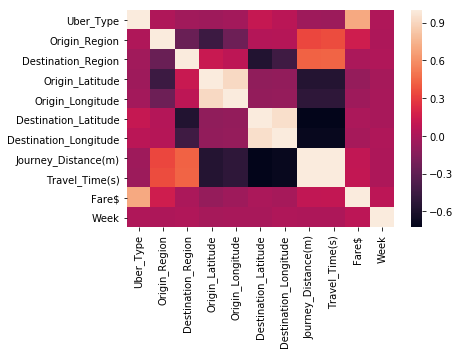

In [84]:
# using seaborn as sns to plot the cor matrix.
sns.heatmap(train.corr())

In [85]:
# we shall now check the accuracy of our model  on uber type 0.
# import LinearRegression and train_test_split from sklearn

# filter the data for Uber type 0.
U1 = train[train['Uber_Type']==0]

# list out the train attributes
X = U1[['Travel_Time(s)', 'Journey_Distance(m)','Week', 'time_cat']]
# list the test attributes
Y = U1['Fare$']

#We split the dataset into 80% train and 20% test data. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# instanciate linear regression model
lm = LinearRegression()

# train the linear model
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
# use predict function to predict the test results on the model.
predictions = lm.predict(X_test)
# print the prediction
print( "predicted values:\n",predictions)
#print the actual value
print( "actual values:\n",Y_test)

predicted values:
 [11.34654633  8.08745635  5.0241593   6.17776195 11.98138137 18.8698851
 10.00859026 12.86696113]
actual values:
 3      11.00
95      8.05
4       4.03
65      5.92
82     11.26
87     18.66
73      9.03
116    12.69
Name: Fare$, dtype: float64


In [87]:
print(metrics.mean_absolute_error(Y_test,predictions))
print(metrics.mean_squared_error(Y_test,predictions))
print(metrics.r2_score(Y_test,predictions))

0.4653427247531253
0.3412110307476051
0.9807495673730607


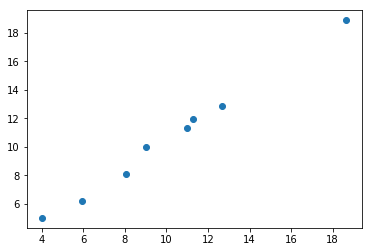

In [88]:
# ploting the predicted and actual values to evalate the accuracy.

plt.scatter(Y_test,predictions)

We see a linear relation ship between actual and predicted values which mean that the model can predict the fare values quite accurately.

We will use the same approach to predict fare for Uber type 0,1 and 2.

### Predicting fare for Uber type 0

In [89]:
# filter the data for Uber type 0.
train_0 = train[train['Uber_Type']==0]
test_0 = test[test["Uber_Type"]==0]

# Building the train dataset.
X_train_0 = train_0[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_train_0 = train_0['Fare$']

# building test dataset.
X_test_0 = test_0[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_test_0 = test_0['Fare$']

In [90]:
# Train the linear regression model.
lm_0 = LinearRegression()
lm_0.fit(X_train_0,Y_train_0)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
# Use the predict function to predict the test results on the model.
predictions = lm_0.predict(X_test_0)
print("predicted values:\n",list(predictions))

predicted values:
 [13.726119168351616, 20.979384184933906, 35.119152454465386, 14.677042614445226, 23.5135890050327, 20.174975526833535, 34.684398332589815, 27.8077010007366, 13.765816937155323, 5.914486164195727, 26.625477704417897, 30.38276882759923]


In [92]:
# we will now try to impute these predicted values into the dataset.
missing_data.at[Y_test_0.index, 'Fare$'] = predictions

### Predicting fare for Uber type 1

In [93]:
# filter the data for Uber type 1.
train_1 = train[train['Uber_Type']==1]
test_1 = test[test["Uber_Type"]==1]

# Building the train dataset.
X_train_1 = train_1[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_train_1 = train_1['Fare$']

# building test dataset.
X_test_1 = test_1[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_test_1 = test_1['Fare$']

In [94]:
# Train the linear regression model.
lm_1 = LinearRegression()
lm_1.fit(X_train_1,Y_train_1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [95]:
# Use the predict function to predict the test results on the model.
predictions = lm_1.predict(X_test_1)
print("predicted values:\n",list(predictions))

predicted values:
 [17.034927075089588, 28.08461193527961, 60.66271006171138, 67.65197801697346]


In [96]:
# we will now try to impute these predicted values into the dataset.
missing_data.at[Y_test_1.index, 'Fare$'] = predictions

### Predicting fare for Uber type 2

In [97]:
# filter the data for Uber type 2.
train_2 = train[train['Uber_Type']==2]
test_2 = test[test["Uber_Type"]==2]


# Building the train dataset.
X_train_2 = train_2[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_train_2 = train_2['Fare$']

# building test dataset.
X_test_2 = test_2[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)',
               'Week', 'time_cat']]
Y_test_2 = test_2['Fare$']

In [98]:
# Train the linear regression model.
lm_2 = LinearRegression()
lm_2.fit(X_train_2,Y_train_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [99]:
# Use the predict function to predict the test results on the model.
predictions = lm_2.predict(X_test_2)
print("predicted values:\n",list(predictions))

predicted values:
 [304.2426840726325, 949.9995934100091]


In [100]:
# we will now try to impute these predicted values into the dataset.
missing_data.at[Y_test_2.index, 'Fare$'] = predictions

In [101]:
# check for any missing values in the dataset.
missing_data.isnull().values.any()

False

In [102]:
missing_datas = missing_data.copy() # make a copy of the final df to revert the changes and write to csv.

# drop additional columns
missing_datas.drop(["time_cat","Week"],axis=1,inplace=True)

# revert the column names
missing_datas.columns = [c.replace('_', ' ') for c in missing_datas.columns]

In [103]:
# final output to the csv.
missing_datas.to_csv("29498724.missing_value_solution.csv")

## 5. Detect and remove outliers <a class="anchor" id="sec_5"></a>

An outlier is an observation point that is distant from other observations. These data points not always are errors, they can be a genuine value which streaches the possibilities to extreme. However, We will need to eliminate the extreme/uncertain values in the dataset to learn the behaviour of the rest. It is very important to carefully analyse and detect outliers in the dataset.
We can determine outliers by various techniques like:
* Box plot
* Scatter plot
* Z score
* IQR score

We will be using determining the mean and standard deviation of the model and test the previous model on the outlier data to identify the fare values outside the region.

In [104]:
outlier_data = pd.read_csv("29498724_outliers.csv") # read the outlier dataset to a variable.

In [105]:
print("dimensions of dataframe:",outlier_data.shape) # prints dimensions of df
outlier_data.head() # print sample df

dimensions of dataframe: (91, 15)


,Unnamed: 0,Unnamed: 0.1,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Departure Date,Departure Time,Travel Time(s),Arrival Time,Fare$
0,0,ID3270665231,1,7,1,-37.861835,144.905716,-37.803847,144.964839,9400.0,2018-01-28,07:57:23,3087.90,8:48:50,25.13
1,1,ID3902429253,1,1,5,-37.810231,144.961403,-37.803849,144.918101,4318.0,2018-03-11,03:48:55,1238.40,4:09:33,23.11
2,2,ID1563466039,0,5,9,-37.806619,144.932422,-38.110916,144.654173,43562.0,2018-07-06,06:27:51,10436.10,9:21:47,18.57
3,3,ID3690693997,1,5,2,-37.806202,144.939776,-37.821611,144.936242,3573.0,2018-03-01,22:25:51,861.72,22:40:12,16.35
4,4,ID3419265468,1,5,4,-37.805089,144.936810,-37.805580,144.997968,5876.0,2018-03-03,07:43:59,1541.82,8:09:40,15.33


In [106]:
outlier_data.info() # understanding the datatypes and entries in our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 15 columns):
Unnamed: 0               91 non-null int64
Unnamed: 0.1             91 non-null object
Uber Type                91 non-null int64
Origin Region            91 non-null int64
Destination Region       91 non-null int64
Origin Latitude          91 non-null float64
Origin Longitude         91 non-null float64
Destination Latitude     91 non-null float64
Destination Longitude    91 non-null float64
Journey Distance(m)      91 non-null float64
Departure Date           91 non-null object
Departure Time           91 non-null object
Travel Time(s)           91 non-null float64
Arrival Time             91 non-null object
Fare$                    91 non-null float64
dtypes: float64(7), int64(4), object(4)
memory usage: 10.7+ KB


In [107]:
outlier_data.describe()

,Unnamed: 0,Uber Type,Origin Region,Destination Region,Origin Latitude,Origin Longitude,Destination Latitude,Destination Longitude,Journey Distance(m),Travel Time(s),Fare$
count,91.00000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.00000,0.582418,4.692308,5.153846,-37.835727,144.942396,-37.854368,144.928198,14400.593407,3796.434066,55.289176
std,26.41338,0.650913,2.519666,2.670510,0.075996,0.086295,0.098280,0.109594,15766.433461,3844.608244,158.040177
min,0.00000,0.000000,1.000000,1.000000,-38.110916,144.654173,-38.110916,144.654173,536.000000,131.340000,2.480000
25%,22.50000,0.000000,2.000000,3.000000,-37.821551,144.931165,-37.861835,144.905716,5137.000000,1253.640000,12.692500
50%,45.00000,0.000000,5.000000,6.000000,-37.813421,144.949048,-37.816330,144.958880,8357.000000,2269.380000,17.010000
75%,67.50000,1.000000,7.000000,7.000000,-37.806713,144.984567,-37.807202,144.985865,11958.000000,3870.240000,23.535000
max,90.00000,2.000000,9.000000,9.000000,-37.773845,145.046450,-37.773845,145.046450,50797.000000,13204.980000,1009.240000


In [108]:
# for convenience we replace all the spaces to "_" in column names 
outlier_data.columns = [c.replace(' ', '_') for c in outlier_data.columns]

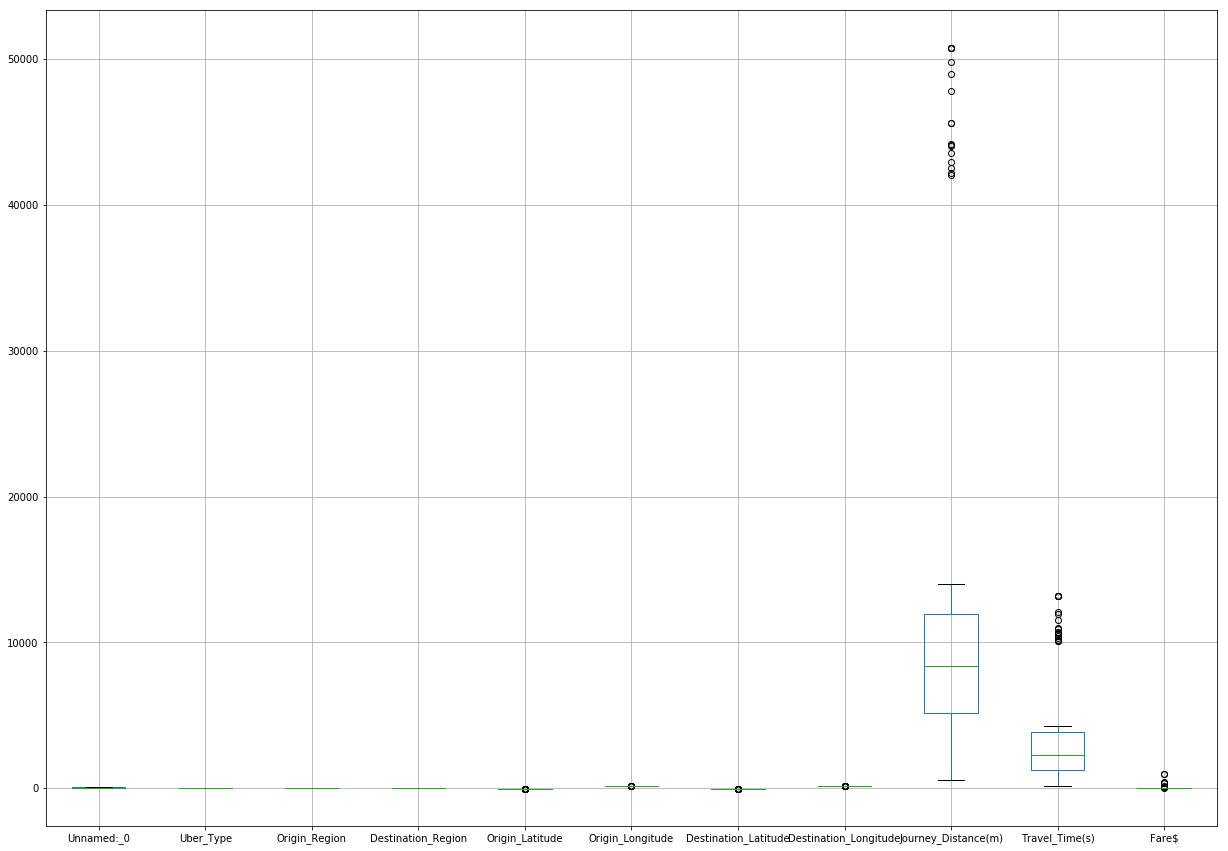

In [109]:
# using box plot, we can estinate the attributes with outliers.

# we now only suspect distance, time and fare.

fig = outlier_data.boxplot(figsize=(21, 15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a14515fd0>,
      dtype=object)

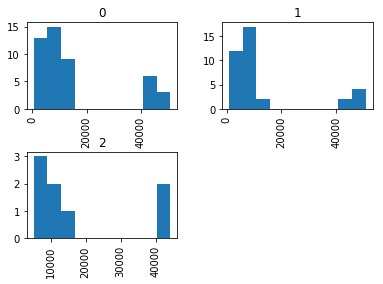

In [110]:
# lets plot the distribution of journey distance over all the uber type to understand the distribution of data.
plot = outlier_data.hist(by="Uber_Type", column="Journey_Distance(m)") 
plot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a15205cf8>,
      dtype=object)

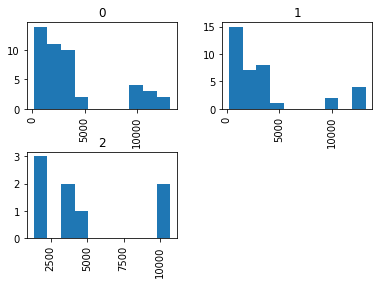

In [111]:
# lets plot the distribution of travel time over all the uber type to understand the distribution of data.
plot = outlier_data.hist(by="Uber_Type", column="Travel_Time(s)") 
plot

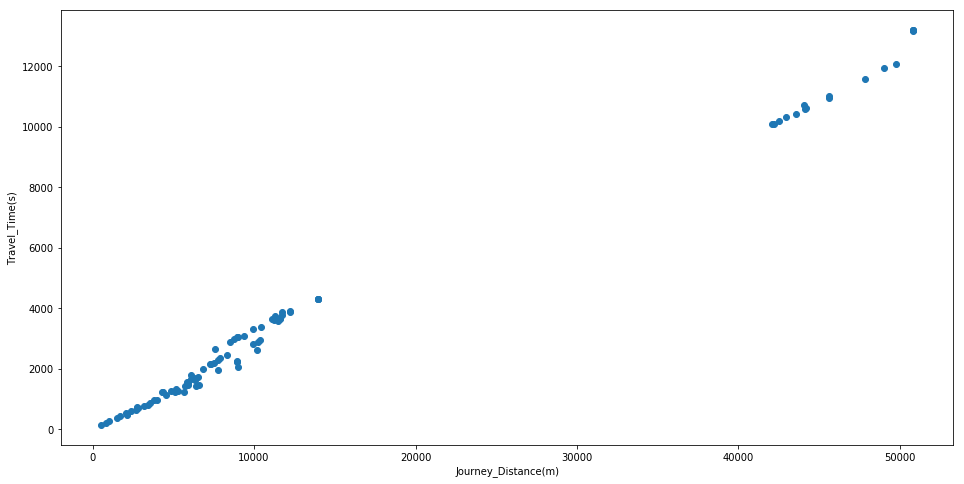

In [112]:
# lets now investigate on those data points away from the cluster.
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(outlier_data['Journey_Distance(m)'], outlier_data['Travel_Time(s)'])
ax.set_xlabel('Journey_Distance(m)')
ax.set_ylabel('Travel_Time(s)')
plt.show()

We can see that the relation is linear and these aspects again influence the fare.
If we determine the outliers in fare and eliminate them, we will be handling the outliers in distance and time aswell. 

We can now explore the distribution of fare in out dataset and the following steps is followed:
* Identify the optimal mean and standard deviation of fare values in each uber type.
* Use the three previous linear model to estimate the fare under each uber type.
* Apply 3 standard deviation range of acceptance for the datapoint and eliminate the rest.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a165e3588>,
      dtype=object)

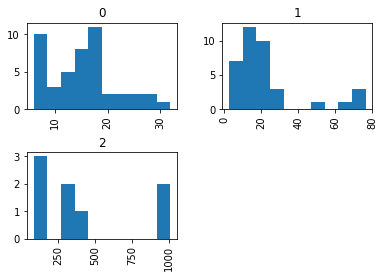

In [113]:
# lets plot the distribution of fare over all the uber type to understand the distribution of data.
plot = outlier_data.hist(by="Uber_Type", column="Fare$") 
plot

In [114]:
# We shall now find the mean and standard deviation of each uber type in the collection of training data of the model.
# note: that the mean and std will be from the training set.

# Uber type 0

pred_0 = lm_0.predict(X_train_0)
Y_train_0 = pd.DataFrame(Y_train_0)
Y_train_0["pred_fare"] = pred_0
Y_train_0["Res"] = Y_train_0["Fare$"] - Y_train_0["pred_fare"]
mean_0 = Y_train_0["Res"].mean()
std_0 = Y_train_0["Res"].std()

# Uber type 1
pred_1 = lm_1.predict(X_train_1)
Y_train_1 = pd.DataFrame(Y_train_1)
Y_train_1["pred_fare"] = pred_1
Y_train_1["Res"] = Y_train_1["Fare$"] - Y_train_1["pred_fare"]
mean_1 = Y_train_1["Res"].mean()
std_1 = Y_train_1["Res"].std()

# Uber type 2
pred_2 = lm_2.predict(X_train_2)
Y_train_2 = pd.DataFrame(Y_train_2)
Y_train_2["pred_fare"] = pred_2
Y_train_2["Res"] = Y_train_2["Fare$"] - Y_train_2["pred_fare"]
mean_2 = Y_train_2["Res"].mean()
std_2 = Y_train_2["Res"].std()


### Predicting fare
We can now use the trained model to predict the fare estimates of outlier data.

In [115]:
# create a column in the df to store the classification of weekdays and departure time.
outlier_data["time_cat"] = cat_dept_time(outlier_data)
outlier_data["Week"] = Weekend(outlier_data)

In [116]:
# filter the data with respect to Uber type 0
U_0 = outlier_data[outlier_data["Uber_Type"]==0]

outlier_0 = U_0[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)','Week', 'time_cat']]

# Use the predict function to predict the test results on the model.
predictions = lm_0.predict(outlier_0)

outlier_data.at[outlier_0.index, 'pred_fare'] = predictions

In [117]:
# filter the data with respect to Uber type 1
U_1 = outlier_data[outlier_data["Uber_Type"]==1]

outlier_1 = U_1[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)','Week', 'time_cat']]

# Use the predict function to predict the test results on the model.
predictions = lm_1.predict(outlier_1)

outlier_data.at[outlier_1.index, 'pred_fare'] = predictions

In [118]:
# filter the data with respect to Uber type 2
U_2 = outlier_data[outlier_data["Uber_Type"]==2]

outlier_2 = U_2[['Origin_Region', 'Travel_Time(s)', 'Journey_Distance(m)','Week', 'time_cat']]

# Use the predict function to predict the test results on the model.
predictions = lm_2.predict(outlier_2)

outlier_data.at[outlier_2.index, 'pred_fare'] = predictions

In [119]:
# calculate the residuals of actual fare and predicted fare.

outlier_data["Residuals"] = outlier_data["Fare$"] - outlier_data["pred_fare"]

In [120]:
# Determining the outliers in Uber type 0
a = outlier_data[outlier_data["Uber_Type"] == 0]

# filtering out all the records which are over 3 std region.
outlier_df_0 = a[(a["Residuals"] <= mean_0-3*std_0) | (a["Residuals"] >= mean_0+3*std_0)]
outlier_df_0

,Unnamed:_0,Unnamed:_0.1,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,time_cat,Week,pred_fare,Residuals
2,2,ID1563466039,0,5,9,-37.806619,144.932422,-38.110916,144.654173,43562.0,2018-07-06,06:27:51,10436.10,9:21:47,18.570,1,0,21.429070,-2.859070
5,5,ID1505505831,0,9,7,-38.110916,144.654173,-37.861835,144.905716,50797.0,2018-07-09,04:06:03,13204.98,7:46:07,31.930,3,0,35.207289,-3.277289
15,15,ID1876444453,0,6,8,-37.787442,144.980409,-37.815834,145.046450,8357.0,2018-01-24,13:50:48,2437.38,14:31:25,6.015,2,0,12.866575,-6.851575
17,17,ID1269220212,0,7,4,-37.861835,144.905716,-37.808218,145.009629,12258.0,2018-01-25,00:49:01,3889.50,1:53:50,17.010,3,0,19.841125,-2.831125
18,18,ID1325161435,0,8,1,-37.815834,145.046450,-37.803895,144.961788,7766.0,2018-07-28,21:17:19,2269.38,21:55:08,18.410,3,1,21.272960,-2.862960
21,21,ID1225658403,0,2,9,-37.810876,144.939070,-38.110916,144.654173,42505.0,2018-04-24,13:01:52,10189.14,15:51:41,20.970,2,0,25.764435,-4.794435
32,32,ID1694952008,0,2,8,-37.814920,144.935323,-37.807202,145.026637,8930.0,2018-03-25,19:47:09,2263.26,20:24:52,13.820,2,1,16.429531,-2.609531
34,34,ID1328910552,0,5,6,-37.805031,144.927906,-37.790797,144.985865,6844.0,2018-01-23,21:40:50,1984.14,22:13:54,7.875,3,0,16.965030,-9.090030
42,42,ID1369609303,0,5,6,-37.806807,144.938072,-37.790797,144.985865,6389.0,2018-01-14,23:22:45,1692.66,23:50:57,17.420,3,1,20.372263,-2.952263
62,62,ID1363566522,0,9,3,-38.110916,144.654173,-37.819722,144.986970,45597.0,2018-05-08,12:26:14,10943.04,15:28:37,24.080,2,0,27.184185,-3.104185


In [121]:
# remove all the outliers from Uber type 0

outlier_data = outlier_data[~ outlier_data["Unnamed:_0"].isin(outlier_df_0["Unnamed:_0"])]

In [122]:
# Determining the outliers in Uber type 1
a = outlier_data[outlier_data["Uber_Type"] == 1]

# filtering out all the records which are over 3 std region.
outlier_df_1 = a[(a["Residuals"] <= mean_1-3*std_1) | (a["Residuals"] >= mean_1+3*std_1)]
outlier_df_1

,Unnamed:_0,Unnamed:_0.1,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,time_cat,Week,pred_fare,Residuals
3,3,ID3690693997,1,5,2,-37.806202,144.939776,-37.821611,144.936242,3573.0,2018-03-01,22:25:51,861.72,22:40:12,16.350,3,0,21.188675,-4.838675
6,6,ID3737338648,1,5,8,-37.805636,144.936709,-37.815834,145.046450,9908.0,2018-06-14,11:44:45,2819.88,12:31:44,8.545,1,0,18.848059,-10.303059
9,9,ID3330975614,1,8,2,-37.815834,145.046450,-37.823130,144.937840,10352.0,2018-01-14,14:54:34,2955.48,15:43:49,23.850,2,1,28.642200,-4.792200
16,16,ID3709424924,1,2,5,-37.816025,144.937069,-37.805926,144.931759,1727.0,2018-06-14,07:00:55,429.18,7:08:04,2.480,1,0,7.672127,-5.192127
20,20,ID3417754382,1,1,2,-37.811701,144.956311,-37.824395,144.944439,2404.0,2018-01-28,22:09:30,607.68,22:19:37,19.580,3,1,23.047739,-3.467739
23,23,ID3457568805,1,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,2018-07-17,05:33:50,4298.28,6:45:28,16.815,3,0,37.261219,-20.446219
26,26,ID3294051683,1,2,9,-37.817538,144.949971,-38.110916,144.654173,42057.0,2018-06-05,01:37:51,10100.76,4:26:11,29.100,3,0,62.835599,-33.735599
30,30,ID3541348025,1,7,2,-37.861835,144.905716,-37.822392,144.952553,8504.0,2018-06-26,09:48:46,2892.30,10:36:58,8.375,1,0,19.444586,-11.069586
33,33,ID3682481754,1,8,4,-37.807202,145.026637,-37.804768,144.998550,2773.0,2018-04-10,22:45:07,705.36,22:56:52,15.430,3,0,20.703472,-5.273472
36,36,ID3487229904,1,4,1,-37.800477,145.020570,-37.815566,144.976287,6317.0,2018-05-17,22:15:19,1633.32,22:42:32,20.970,3,0,24.648820,-3.678820


In [123]:
# remove all the outliers from Uber type 0

outlier_data = outlier_data[~ outlier_data["Unnamed:_0"].isin(outlier_df_1["Unnamed:_0"])]

In [124]:
# Determining the outliers in Uber type 2
a = outlier_data[outlier_data["Uber_Type"] == 2]

# filtering out all the records which are over 3 std region.
outlier_df_2 = a[(a["Residuals"] <= mean_2-3*std_2) | (a["Residuals"] >= mean_2+3*std_2)]
outlier_df_2

,Unnamed:_0,Unnamed:_0.1,Uber_Type,Origin_Region,Destination_Region,Origin_Latitude,Origin_Longitude,Destination_Latitude,Destination_Longitude,Journey_Distance(m),Departure_Date,Departure_Time,Travel_Time(s),Arrival_Time,Fare$,time_cat,Week,pred_fare,Residuals
19,19,ID5756435151,2,8,7,-37.807202,145.026637,-37.861835,144.905716,13986.0,2018-04-02,05:23:21,4298.28,6:34:59,423.210,3,0,344.231942,78.978058
37,37,ID5997111873,2,8,1,-37.815834,145.046450,-37.809223,144.964832,7290.0,2018-05-22,12:22:46,2143.98,12:58:29,109.595,2,0,179.148435,-69.553435
53,53,ID5511209799,2,3,9,-37.822236,144.967743,-38.110916,144.654173,44077.0,2018-05-05,15:07:33,10709.70,18:06:02,1009.240,2,1,812.376038,196.863962
55,55,ID5566524828,2,3,7,-37.821794,145.009517,-37.861835,144.905716,11493.0,2018-07-27,04:01:32,3566.82,5:00:58,357.110,3,0,289.764961,67.345039
67,67,ID5294942130,2,2,3,-37.819520,144.943513,-37.816330,144.995894,5173.0,2018-04-16,15:29:41,1332.24,15:51:53,142.990,2,0,118.667903,24.322097
76,76,ID5662680326,2,6,7,-37.787433,144.980377,-37.861835,144.905716,11633.0,2018-01-21,06:08:06,3663.78,7:09:09,355.800,1,1,289.583091,66.216909
83,83,ID5784352107,2,2,9,-37.816086,144.928750,-38.110916,144.654173,44193.0,2018-06-25,15:39:52,10622.10,18:36:54,994.680,2,0,798.315803,196.364197
87,87,ID5243219877,2,6,2,-37.787442,144.980409,-37.824711,144.945655,6080.0,2018-02-21,10:11:07,1665.54,10:38:52,82.835,1,0,136.139286,-53.304286


In [125]:
# remove all the outliers from Uber type 0

outlier_data = outlier_data[~ outlier_data["Unnamed:_0"].isin(outlier_df_2["Unnamed:_0"])]

In [126]:
# drop additional columns
outlier_data.drop(["time_cat","Week","pred_fare","Residuals"],axis=1,inplace=True)

# revert the column names
outlier_data.columns = [c.replace('_', ' ') for c in outlier_data.columns]

In [127]:
outlier_data.to_csv("29498724_outliers_soluntion.csv")

## 6. Summary <a class="anchor" id="sec_6"></a>

I start off with detecting **Syntactic Anomalies** and **Semantic Anomalies** in the dirty data and figureout the best way to fix these errors. I followed the below steps to fix the errors:
* Corrected the errors in uber type using Trip ID.
* Fixed the date format and entry errors in departure date.
* Identified the errors in arrival and departure dates and swapped it.
* Explored the sign errors in latitude and longitude and fixed it.
* Used Haversine formula to determine the distance and assigned the co-ordinates to respective origin and destination region.
* Determined the correct journey distance and travel time with the help of Dijkstra algorithm.

I then investigated on the missing dataset to impute the missing values in the dataset. I performed the following:
* Imputed the missing uber type using Trip ID.
* Trained a linear regression model to arrive at the values for missing fare values.
    * Found correlation between features and arrived at the best set of features to predict fare.
    * Understood that the model needs to trained for each uber type and performed data patition.
    * Trained 3 different linear regression models to impute values under 3 different uber types.
    
An outlier is an observation point that is distant from other observations. Exploring the outlier data explains the existance of outlier in fare which is dependent on journey distance and travel time.
* Used the models generated in previous imputation task to predict the trained data.
* Calculated the mean and standard deviation of the train residuals.
* Predicted the outlier data on the 3 different models respectively.
* calcluated the residuals for outlier dataset.
* performed outlier detection using 3 standard deviation method.
* deleted the outliers in the data.

The data is reverted back into the initial dimentions, datatypes and read into csv files after every task is performed.

## 7. References <a class="anchor" id="sec_7"></a>
- https://datascience.stackexchange.com/questions/33053/how-do-i-compare-columns-in-different-data-frames
- https://stackoverflow.com/questions/41689722/how-to-select-rows-that-do-not-start-with-some-str-in-pandas/41689804
- https://stackoverflow.com/questions/6402812/how-to-convert-an-hmmss-time-string-to-seconds-in-python/6402934
- https://stackoverflow.com/questions/25792619/what-is-correct-syntax-to-swap-column-values-for-selected-rows-in-a-pandas-data
- https://datatofish.com/if-condition-in-pandas-dataframe/
- https://towardsdatascience.com/linear-regression-using-python-ce21aa90ade6
- https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.groupby.html
- https://en.wikipedia.org/wiki/Haversine_formula
- https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
- https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba